In [1]:
import os
import cv2
import shutil
import random
import numpy as nptw
import pandas as pd
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
images_dir = r"images"
train_images_dir = r"train_images"
test_images_dir = r"test_images"

img_size = 224
batch_size = 32

generator = ImageDataGenerator(zoom_range = 0.3,
                               rotation_range = 90,
                               horizontal_flip = True,
                               vertical_flip = True,
                               validation_split = 0.1,)
train_data = generator.flow_from_directory(
                            train_images_dir,
                            target_size = (img_size, img_size),
                            batch_size = batch_size,
                            subset = "training")

validation_data = generator.flow_from_directory(
                            train_images_dir,
                            target_size = (img_size, img_size),
                            batch_size = 32,
                            subset = "validation")

test_data = generator.flow_from_directory(
                            test_images_dir,
                            target_size = (img_size, img_size),
                            batch_size = batch_size,
                            subset = "validation")

Found 7213 images belonging to 7 classes.
Found 799 images belonging to 7 classes.
Found 198 images belonging to 7 classes.


In [4]:
from tensorflow.keras.applications import InceptionV3
from keras import Model

inception_model = InceptionV3(weights="imagenet", include_top = False, input_shape = (224, 224, 3))
for layer in inception_model.layers:
    layer.trainable = False
inception_model.summary()
last_layer = inception_model.get_layer('mixed10')
last_output = last_layer.output

x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(7, activation='softmax')(x)
model = Model(inception_model.input, x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [4]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.5550 - loss: 17.8212 - val_accuracy: 0.6708 - val_loss: 1.0280
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.6775 - loss: 1.2120 - val_accuracy: 0.6708 - val_loss: 1.0012
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.6691 - loss: 1.1744 - val_accuracy: 0.6708 - val_loss: 0.9693
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.6678 - loss: 1.1437 - val_accuracy: 0.6708 - val_loss: 0.9942
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.6753 - loss: 1.1111 - val_accuracy: 0.6708 - val_loss: 1.0072
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.6827 - loss: 1.1117 - val_accuracy: 0.6708 - val_loss: 1.0465
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.6700 - loss: 1.1031 - val_accuracy: 0.6708 - val_loss: 0.9997
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.6699 - loss: 1.0734 - val_acc

In [5]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

for layer in inception_model.layers:
    layer.trainable = True

optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [6]:

epochs = 20
history = model.fit(train_data,
                              epochs = epochs, validation_data = validation_data,
                              verbose = 1, 
                              callbacks=[learning_rate_reduction])

Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1011s 4s/step - acc: 0.6766 - loss: 0.9809 - val_acc: 0.6871 - val_loss: 1.1022 - learning_rate: 1.0000e-04
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 959s 4s/step - acc: 0.7582 - loss: 0.6706 - val_acc: 0.7785 - val_loss: 0.7316 - learning_rate: 1.0000e-04
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 955s 4s/step - acc: 0.7970 - loss: 0.5587 - val_acc: 0.8035 - val_loss: 0.6096 - learning_rate: 1.0000e-04
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 959s 4s/step - acc: 0.8225 - loss: 0.5001 - val_acc: 0.8273 - val_loss: 0.5427 - learning_rate: 1.0000e-04
Epoch 5/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 955s 4s/step - acc: 0.8526 - loss: 0.4182 - val_acc: 0.8210 - val_loss: 0.5363 - learning_rate: 1.0000e-04
Epoch 6/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 959s 4s/step - acc: 0.8652 - loss: 0.3764 - val_acc: 0.8198 - val_loss: 0.5521 - learning_rate: 1.0000e-04
Epoch 7/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 956s 4s/step - acc: 0.8700 - loss: 0.3599 - val_acc: 0.8398 - val_loss: 0.527

In [10]:
model.save('inceptionmodel.keras')

In [3]:
from tensorflow.keras.optimizers import Adam

custom_optimizer = Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    decay=0.0,
    amsgrad=False
)

model = tf.keras.models.load_model('inceptionmodel.keras', compile=False)

model.compile(
    loss='categorical_crossentropy',
    optimizer=custom_optimizer,
    metrics=['acc']
)



In [4]:
loss, accuracy = model.evaluate(test_data, verbose=2)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

7/7 - 11s - 2s/step - acc: 0.9141 - loss: 0.3044
Test Loss: 0.30439135432243347
Test Accuracy: 0.9141414165496826


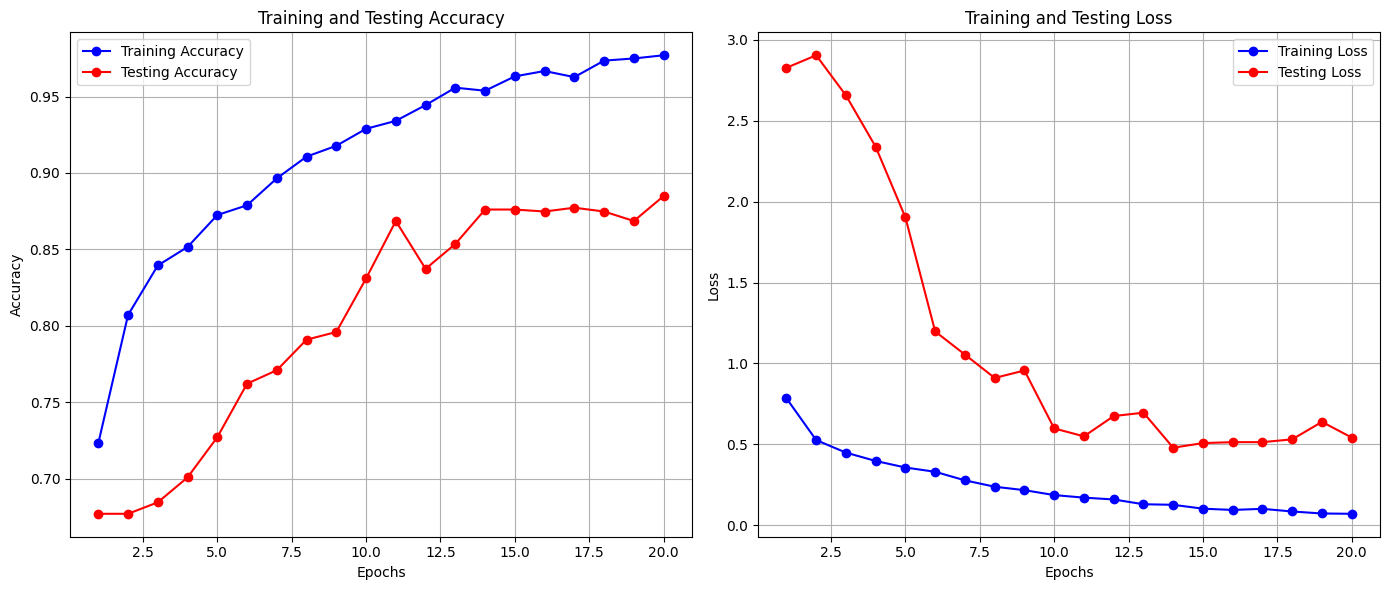

In [1]:
import matplotlib.pyplot as plt

# Store the results
epochs = range(1, 21)
train_acc = [0.7232, 0.8071, 0.8395, 0.8516, 0.8725, 0.8789, 0.8965, 0.9107, 0.9178, 0.9289,
              0.9341, 0.9444, 0.9558, 0.9538, 0.9632, 0.9667, 0.9627, 0.9735, 0.9749, 0.9770]
train_loss = [0.7848, 0.5262, 0.4487, 0.3971, 0.3566, 0.3302, 0.2773, 0.2378, 0.2166, 0.1862,
               0.1704, 0.1591, 0.1295, 0.1261, 0.1021, 0.0943, 0.1012, 0.0847, 0.0724, 0.0705]
val_acc = [0.6771, 0.6771, 0.6846, 0.7009, 0.7272, 0.7622, 0.7710, 0.7910, 0.7960, 0.8310,
            0.8686, 0.8373, 0.8536, 0.8761, 0.8761, 0.8748, 0.8773, 0.8748, 0.8686, 0.8849]
val_loss = [2.8277, 2.9052, 2.6570, 2.3392, 1.9023, 1.1975, 1.0547, 0.9103, 0.9565, 0.5981,
             0.5494, 0.6747, 0.6956, 0.4790, 0.5076, 0.5134, 0.5134, 0.5308, 0.6388, 0.5416]
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()